<a href="https://colab.research.google.com/github/lovepreetmultani/python/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import time
from datetime import datetime as dt
from sklearn.feature_selection import  f_classif, SelectKBest

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
fraud=pd.read_csv("drive/My Drive/Dissertation/Dataset1-Small.csv")

In [4]:
fraud.head()

,tx_fraud,tx_amount,s_pagerank,s_label,s_min_send_tx,s_min_receieve_tx,s_max_send_tx,s_max_recieve_tx,s_avg_send_tx,s_avg_recieve_tx,...,r_label,r_min_send_tx,r_min_receieve_tx,r_max_send_tx,r_max_recieve_tx,r_avg_send_tx,r_avg_recieve_tx,r_cnt_recieve_tx,r_cnt_send_tx,r_timestamp
0,True,12.03,0.63381,36700160,12.03,12.03,196.16,1435278.50,195.58639,6944.97204,...,36700160,12.03,12.03,196.16,1435278.50,195.58639,6944.97204,260,321,155
1,True,12.03,1.68611,36700160,12.03,0.00,384.57,4688613.00,364.96263,30285.41079,...,36700160,12.03,0.00,384.57,4688613.00,364.96263,30285.41079,291,19,155
2,True,10.97,1.28928,36700160,10.97,10.97,443.75,191756.68,441.31865,3648.11561,...,36700160,10.97,10.97,443.75,191756.68,441.31865,3648.11561,57,178,29
3,True,10.97,1.65609,36700160,10.97,2.57,114.26,452719.50,113.68934,23701.77349,...,36700160,10.97,2.57,114.26,452719.50,113.68934,23701.77349,43,181,29
4,True,11.06,4.69883,36700160,11.06,4.67,385.88,5403973.50,375.47093,31433.54074,...,36700160,11.06,4.67,385.88,5403973.50,375.47093,31433.54074,685,107,145


In [5]:
fraud.columns

Index(['tx_fraud', 'tx_amount', 's_pagerank', 's_label', 's_min_send_tx',
       's_min_receieve_tx', 's_max_send_tx', 's_max_recieve_tx',
       's_avg_send_tx', 's_avg_recieve_tx', 's_cnt_recieve_tx',
       's_cnt_send_tx', 's_timestamp', 'r_pagerank', 'r_label',
       'r_min_send_tx', 'r_min_receieve_tx', 'r_max_send_tx',
       'r_max_recieve_tx', 'r_avg_send_tx', 'r_avg_recieve_tx',
       'r_cnt_recieve_tx', 'r_cnt_send_tx', 'r_timestamp'],
      dtype='object')

In [6]:
fraud.describe()

,tx_amount,s_pagerank,s_label,s_min_send_tx,s_min_receieve_tx,s_max_send_tx,s_max_recieve_tx,s_avg_send_tx,s_avg_recieve_tx,s_cnt_recieve_tx,...,r_label,r_min_send_tx,r_min_receieve_tx,r_max_send_tx,r_max_recieve_tx,r_avg_send_tx,r_avg_recieve_tx,r_cnt_recieve_tx,r_cnt_send_tx,r_timestamp
count,9.999000e+03,9999.000000,9.999000e+03,9999.000000,9999.000000,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9999.000000,...,9.999000e+03,9999.000000,9999.000000,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000
mean,2.555234e+04,1.713778,3.698802e+07,317.732244,138.736323,3.440752e+05,1.793571e+06,6.325018e+04,2.841785e+04,222.875588,...,3.698802e+07,317.732244,138.736323,3.440752e+05,1.793571e+06,6.325018e+04,2.841785e+04,222.875588,182.421842,109.918292
std,2.527850e+05,2.241151,2.510260e+06,979.342870,3581.719727,1.199000e+06,2.195607e+06,2.215979e+05,7.191924e+04,274.724104,...,2.510260e+06,979.342870,3581.719727,1.199000e+06,2.195607e+06,2.215979e+05,7.191924e+04,274.724104,167.106085,56.175806
min,2.430000e+00,0.150000,3.355444e+07,0.000000,0.000000,5.670000e+00,0.000000e+00,5.670000e+00,0.000000e+00,0.000000,...,3.355444e+07,0.000000,0.000000,5.670000e+00,0.000000e+00,5.670000e+00,0.000000e+00,0.000000,9.000000,0.000000
25%,2.624000e+01,0.497900,3.670016e+07,13.260000,7.960000,1.168300e+02,8.947636e+04,1.168300e+02,1.163978e+03,64.000000,...,3.670016e+07,13.260000,7.960000,1.168300e+02,8.947636e+04,1.168300e+02,1.163978e+03,64.000000,51.000000,63.000000
50%,1.666400e+02,0.919390,3.670016e+07,134.020000,12.340000,2.087200e+02,1.081127e+06,2.055122e+02,1.018922e+04,123.000000,...,3.670016e+07,134.020000,12.340000,2.087200e+02,1.081127e+06,2.055122e+02,1.018922e+04,123.000000,177.000000,117.000000
75%,4.518200e+02,1.893890,3.670016e+07,400.230000,20.070000,4.807600e+02,2.665686e+06,4.807600e+02,3.143354e+04,260.000000,...,3.670016e+07,400.230000,20.070000,4.807600e+02,2.665686e+06,4.807600e+02,3.143354e+04,260.000000,190.000000,156.000000
max,7.575834e+06,14.883020,6.606031e+07,20725.990000,309033.180000,1.147575e+07,1.147575e+07,2.328694e+06,2.058318e+06,1674.000000,...,6.606031e+07,20725.990000,309033.180000,1.147575e+07,1.147575e+07,2.328694e+06,2.058318e+06,1674.000000,761.000000,199.000000


In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tx_fraud           9999 non-null   bool   
 1   tx_amount          9999 non-null   float64
 2   s_pagerank         9999 non-null   float64
 3   s_label            9999 non-null   int64  
 4   s_min_send_tx      9999 non-null   float64
 5   s_min_receieve_tx  9999 non-null   float64
 6   s_max_send_tx      9999 non-null   float64
 7   s_max_recieve_tx   9999 non-null   float64
 8   s_avg_send_tx      9999 non-null   float64
 9   s_avg_recieve_tx   9999 non-null   float64
 10  s_cnt_recieve_tx   9999 non-null   int64  
 11  s_cnt_send_tx      9999 non-null   int64  
 12  s_timestamp        9999 non-null   int64  
 13  r_pagerank         9999 non-null   float64
 14  r_label            9999 non-null   int64  
 15  r_min_send_tx      9999 non-null   float64
 16  r_min_receieve_tx  9999 

In [8]:
# Print the number of duplicate rows
duplicates = fraud.duplicated()
print("Number of duplicate rows: ", duplicates.sum())

Number of duplicate rows:  667


In [9]:
# To check the null values
fraud.isnull().sum()

tx_fraud             0
tx_amount            0
s_pagerank           0
s_label              0
s_min_send_tx        0
s_min_receieve_tx    0
s_max_send_tx        0
s_max_recieve_tx     0
s_avg_send_tx        0
s_avg_recieve_tx     0
s_cnt_recieve_tx     0
s_cnt_send_tx        0
s_timestamp          0
r_pagerank           0
r_label              0
r_min_send_tx        0
r_min_receieve_tx    0
r_max_send_tx        0
r_max_recieve_tx     0
r_avg_send_tx        0
r_avg_recieve_tx     0
r_cnt_recieve_tx     0
r_cnt_send_tx        0
r_timestamp          0
dtype: int64

<Axes: >

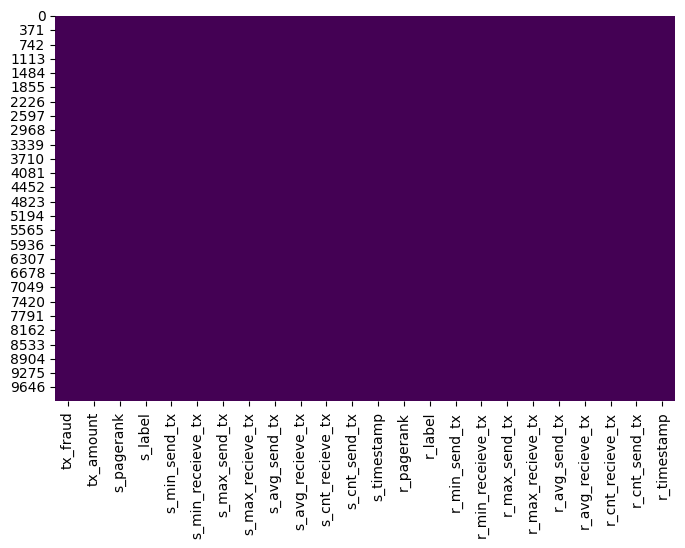

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(fraud.isnull(),cbar=False,cmap='viridis')

In [11]:
fraud['tx_fraud'].value_counts()

False    9649
True      350
Name: tx_fraud, dtype: int64

<Axes: xlabel='tx_fraud', ylabel='count'>

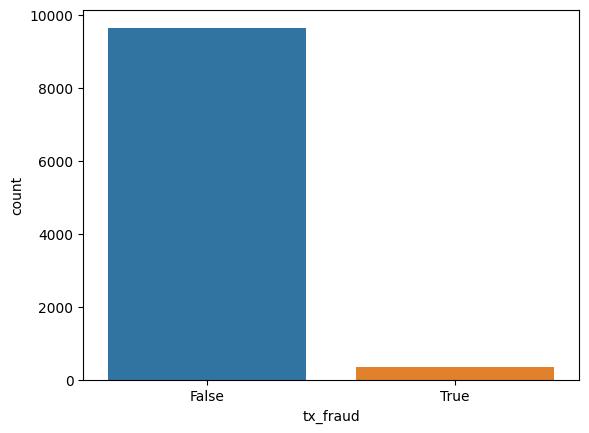

In [19]:
sns.countplot(x='tx_fraud',data=fraud)

<Figure size 1600x600 with 0 Axes>

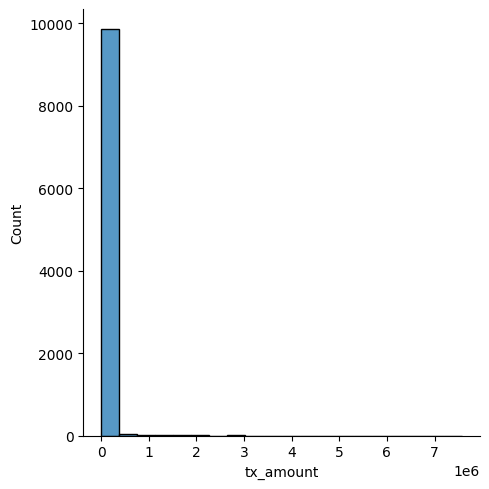

In [28]:
plt.figure(figsize=(16,6))
sns.displot(fraud['tx_amount'],kde=False, bins=20)
plt.show()

<ipython-input-39-94a53ad4d2e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud['tx_amount'])


<Axes: xlabel='tx_amount', ylabel='Density'>

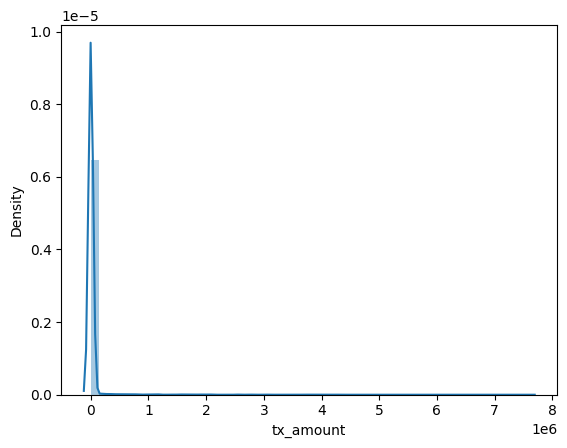

In [39]:
sns.distplot(fraud['tx_amount'])

In [ ]:
sns.countplot(df['bedrooms'])

In [29]:
fraud.corr()

,tx_fraud,tx_amount,s_pagerank,s_label,s_min_send_tx,s_min_receieve_tx,s_max_send_tx,s_max_recieve_tx,s_avg_send_tx,s_avg_recieve_tx,...,r_label,r_min_send_tx,r_min_receieve_tx,r_max_send_tx,r_max_recieve_tx,r_avg_send_tx,r_avg_recieve_tx,r_cnt_recieve_tx,r_cnt_send_tx,r_timestamp
tx_fraud,1.000000,-0.019245,0.054305,-0.019114,-0.046002,-0.006364,0.042218,0.057097,0.031057,0.018698,...,-0.019114,-0.046002,-0.006364,0.042218,0.057097,0.031057,0.018698,0.016236,-0.029268,-0.038472
tx_amount,-0.019245,1.000000,-0.023046,0.011421,0.054976,-0.000952,0.159429,0.039398,0.155863,0.042961,...,0.011421,0.054976,-0.000952,0.159429,0.039398,0.155863,0.042961,-0.023152,-0.051618,0.112709
s_pagerank,0.054305,-0.023046,1.000000,-0.075474,-0.074811,-0.021561,-0.057471,0.269397,-0.064392,-0.084602,...,-0.075474,-0.074811,-0.021561,-0.057471,0.269397,-0.064392,-0.084602,0.858564,0.004654,-0.011322
s_label,-0.019114,0.011421,-0.075474,1.000000,0.003337,0.032734,-0.015153,-0.081657,-0.012765,0.072235,...,1.000000,0.003337,0.032734,-0.015153,-0.081657,-0.012765,0.072235,-0.085902,-0.037305,0.014653
s_min_send_tx,-0.046002,0.054976,-0.074811,0.003337,1.000000,-0.005715,0.416464,-0.015109,0.445455,0.006194,...,0.003337,1.000000,-0.005715,0.416464,-0.015109,0.445455,0.006194,-0.082421,-0.168594,-0.005554
s_min_receieve_tx,-0.006364,-0.000952,-0.021561,0.032734,-0.005715,1.000000,-0.006665,-0.006518,-0.006194,0.276921,...,0.032734,-0.005715,1.000000,-0.006665,-0.006518,-0.006194,0.276921,-0.026370,-0.019826,0.007277
s_max_send_tx,0.042218,0.159429,-0.057471,-0.015153,0.416464,-0.006665,1.000000,-0.046909,0.966788,-0.020952,...,-0.015153,0.416464,-0.006665,1.000000,-0.046909,0.966788,-0.020952,-0.079304,-0.277675,-0.019684
s_max_recieve_tx,0.057097,0.039398,0.269397,-0.081657,-0.015109,-0.006518,-0.046909,1.000000,-0.050958,0.341115,...,-0.081657,-0.015109,-0.006518,-0.046909,1.000000,-0.050958,0.341115,0.358079,0.086107,-0.022642
s_avg_send_tx,0.031057,0.155863,-0.064392,-0.012765,0.445455,-0.006194,0.966788,-0.050958,1.000000,-0.018444,...,-0.012765,0.445455,-0.006194,0.966788,-0.050958,1.000000,-0.018444,-0.078244,-0.275994,-0.022509
s_avg_recieve_tx,0.018698,0.042961,-0.084602,0.072235,0.006194,0.276921,-0.020952,0.341115,-0.018444,1.000000,...,0.072235,0.006194,0.276921,-0.020952,0.341115,-0.018444,1.000000,-0.129823,-0.022998,-0.002509


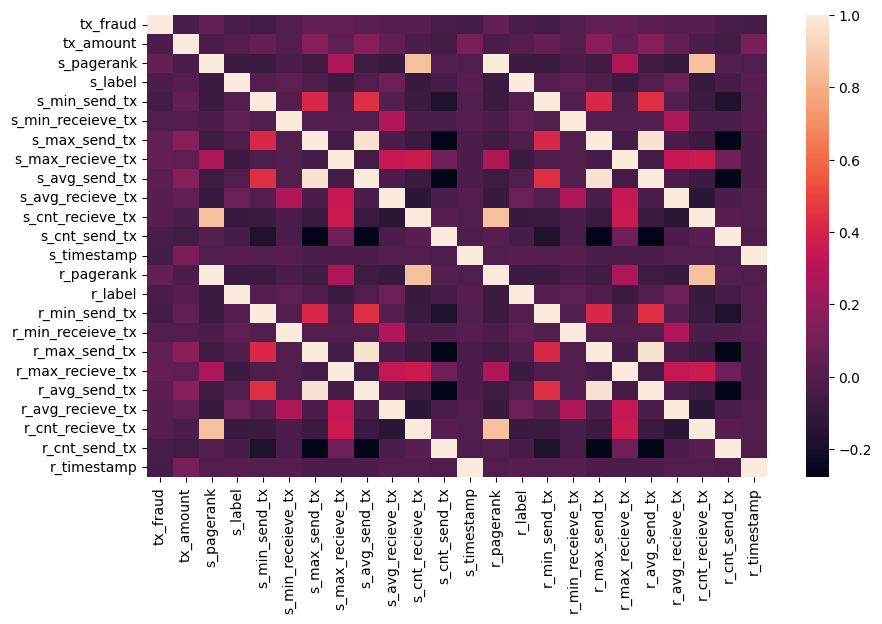

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(fraud.corr(),annot=False)
plt.show()

<Axes: xlabel='tx_fraud', ylabel='tx_amount'>

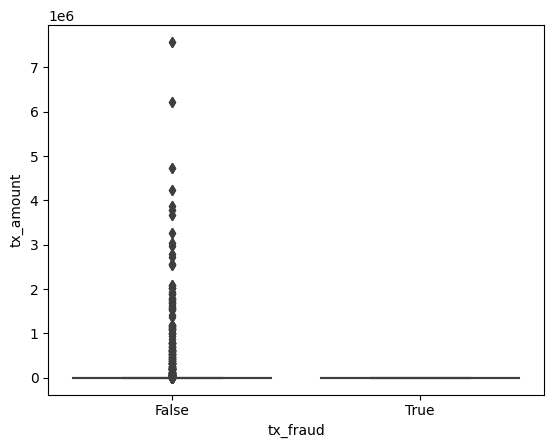

In [40]:
sns.boxplot(x='tx_fraud', y='tx_amount', data=fraud) #less amount loan is paid off instead of more amount

In [41]:
fraud.columns

Index(['tx_fraud', 'tx_amount', 's_pagerank', 's_label', 's_min_send_tx',
       's_min_receieve_tx', 's_max_send_tx', 's_max_recieve_tx',
       's_avg_send_tx', 's_avg_recieve_tx', 's_cnt_recieve_tx',
       's_cnt_send_tx', 's_timestamp', 'r_pagerank', 'r_label',
       'r_min_send_tx', 'r_min_receieve_tx', 'r_max_send_tx',
       'r_max_recieve_tx', 'r_avg_send_tx', 'r_avg_recieve_tx',
       'r_cnt_recieve_tx', 'r_cnt_send_tx', 'r_timestamp'],
      dtype='object')

In [38]:
fraud.groupby('tx_fraud')['tx_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
tx_fraud,,,,,,,,
False,9649.0,26478.846142,257281.609174,2.43,36.2400,168.13,462.45,7575834.00
True,350.0,9.877600,6.013670,2.57,3.9425,10.97,15.71,19.96


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score

In [14]:
#for dependent and independent variables for training the model
X = fraud.drop('tx_fraud', axis = 1)
y = fraud[['tx_fraud']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
#SelectKBest is a feature selection method in machine learning used to select the top K most important features from a dataset
def featureSelect_dataframe(X, y, criteria, k):
  reg = SelectKBest(criteria, k=k).fit(X,y)
  X_transformed = reg.transform(X)
  X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]
  return X

New_X = featureSelect_dataframe(X_train, y_train, f_classif, 8)

New_X

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,s_pagerank,s_min_send_tx,s_max_recieve_tx,s_timestamp,r_pagerank,r_min_send_tx,r_max_recieve_tx,r_timestamp
9253,0.81742,192.33,453993.12,121,0.81742,192.33,453993.12,121
1561,0.37674,514.04,2159019.00,135,0.37674,514.04,2159019.00,135
1670,4.73553,13.83,779302.50,132,4.73553,13.83,779302.50,132
6086,1.88203,12.52,4270699.00,64,1.88203,12.52,4270699.00,64
7332,0.40206,18.61,189.72,95,0.40206,18.61,189.72,95
...,...,...,...,...,...,...,...,...
5734,5.47931,6.69,3776996.25,65,5.47931,6.69,3776996.25,65
5191,1.09545,176.75,732539.50,18,1.09545,176.75,732539.50,18
5390,0.32256,27.51,130.49,64,0.32256,27.51,130.49,64
860,0.58907,24.80,159.63,166,0.58907,24.80,159.63,166
